# 1. Введение

<br>
In this project, we are considering data from Kaggle (https://www.kaggle.com/datasets/budnyak/wine-rating-and-price/code? select=White.csv) about 4 types of wine - ***white, red, pink and sparkling***. The price of wine may depend on various factors, such as the quality of the grapes used, the region of grape cultivation, the harvest (year) of the wine, the production process, the aging process and the reputation of the winery or brand. Other factors that may affect the price include market demand, rarity and exclusivity. In addition, taxes, import/export fees and distribution costs can also affect the final price of wine. 
**Relevance:** statistical study of wine allows you to identify fundamental factors that affect its price and consumer preferences <br>
**Research question:** How is the age of wine related to its quality and price? 
<br>**Hypothesis** 1: The older the wines, the higher their rating. All wines become BETTER over time - the rating of the wine is linearly proportional to the date of its production. 
<br>**Hypothesis 2:** The older the wine, the more expensive it is. All wines become MORE EXPENSIVE over time - the price of wine is linearly proportional to the date of its manufacture. 
---



# 2. Analysis


**Methodology.**  The obtained data (4 datasets in csv format) for different types of wines were first loaded into the environment. Datasets contain comparable columns - Name (name of the wine), Country (Country of production), Region (Region), Winary (winery), Rating (rating), NumberOfRatings (number of people who rated the wine), Price (price in Euro), Year (year of manufacture). For convenience, the data for all wines was combined into one wines dataframe with the added WineStyle column, which contains an indication of the wine type - red/white/rose/sparkling.

In [13]:
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Colab Notebooks')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy.stats import pearsonr, spearmanr
from scipy.stats import shapiro, jarque_bera

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
# Читаем исходные датасеты из файлов
white = pd.read_csv(f'winestyle/White.csv')
red = pd.read_csv(f'winestyle/Red.csv')
rose = pd.read_csv(f'winestyle/Rose.csv')
sparkling = pd.read_csv(f'winestyle/Sparkling.csv')

# Объединяем датафремы в один для удобства
red['WineStyle'] = 'red'
white['WineStyle'] = 'white'
sparkling['WineStyle'] = 'sparkling'
rose['WineStyle'] = 'rose'
wines =  pd.concat([red, white, sparkling, rose], ignore_index=True)


In [ ]:
# Смотрим получившийся объединенный датасет
wines

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,WineStyle
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011,red
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017,red
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015,red
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019,red
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016,red
...,...,...,...,...,...,...,...,...,...
13829,Côte des Roses Rosé 2019,France,Languedoc,Gérard Bertrand,3.9,1750,9.36,2019,rose
13830,M Rosé 2019,France,Côtes de Provence,Minuty,4.0,2046,12.85,2019,rose
13831,Whispering Angel Rosé 2019,France,Côtes de Provence,Château d'Esclans,4.2,2990,16.47,2019,rose
13832,Vinho Verde Rosé N.V.,Portugal,Vinho Verde,Casal Garcia,3.5,9493,4.35,N.V.,rose


Before proceeding with the analysis, it was necessary to find out the number of missing values:

In [ ]:
print(f'{wines[wines["Year"] == "N.V."].shape[0]} из {wines.shape[0]} строк имеют значения N.V. вместо года')

744 из 13834 строк имеют значения N.V. вместо года


Rows containing missing values ​​for the year of production were removed from the study (since this is the key parameter being studied): 

In [ ]:
# Удаляем строки, содержащие NA
wines['Year'] = wines['Year'].replace('N.V.', np.nan)
wines.dropna(inplace = True)

# Преобразуем года в число
wines['Year'] = wines['Year'].astype('int')

The analysis begins with descriptive statistics (mean, maximum and minimum, etc.) for the numerical variables Rating, Price and Year of Manufacture:

In [ ]:
# Описательные статистики для численных переменных
wines[['Rating', 'Price', 'Year']].describe()

,Rating,Price,Year
count,13090.000000,13090.000000,13090.000000
mean,3.868877,33.490910,2015.531780
std,0.298953,72.603154,3.276464
min,2.500000,3.550000,1961.000000
25%,3.700000,9.900000,2015.000000
50%,3.900000,15.950000,2016.000000
75%,4.100000,32.500000,2018.000000
max,4.900000,3410.790000,2020.000000


Value counts tables were built for the WineStyle and Country variables:

In [ ]:
# Value counts для категориальных переменных
print(f'Value counts для переменной WineStyle')
value_counts_ws = pd.DataFrame(wines['WineStyle'].value_counts())
display(value_counts_ws)

print(f'Value counts для переменной Country')
value_counts_c = pd.DataFrame(wines['Country'].value_counts())
display(value_counts_c)


Value counts для переменной WineStyle


,WineStyle
red,8658
white,3759
rose,394
sparkling,279


Value counts для переменной Country


,Country
Italy,3636
France,3144
Spain,1483
Germany,1176
South Africa,833
United States,525
Austria,477
Chile,429
Portugal,327
Australia,313


Отобразили распредление цены вин (медиана) от страны:

<ipython-input-18-b50b1f05ccb6>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  wines_country = wines.groupby(wines["Country"]).median()


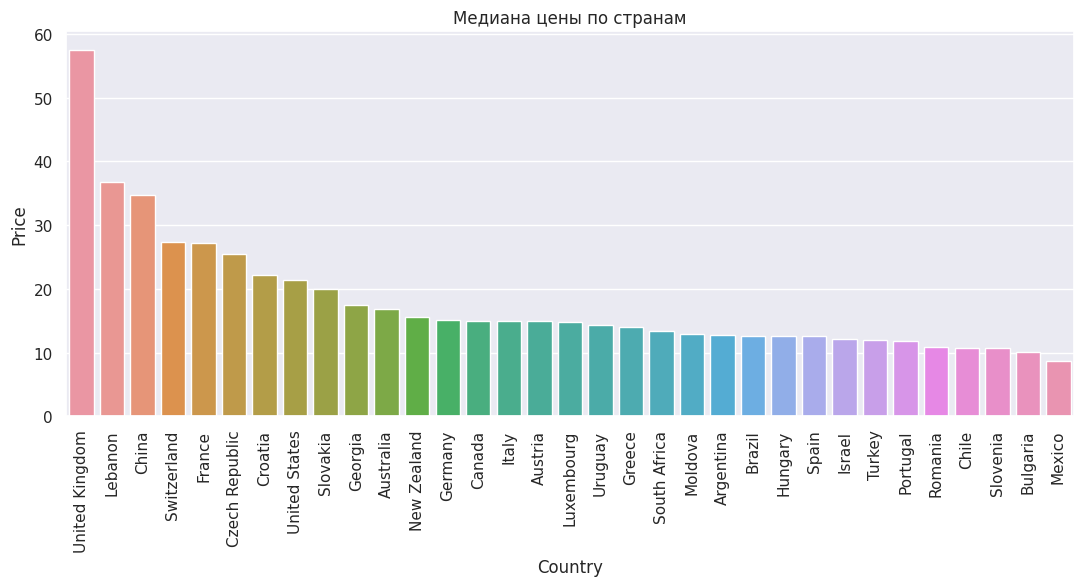

In [ ]:
plt.figure(figsize=(13, 5))
wines_country = wines.groupby(wines["Country"]).median()
#check = wines_country[(wines_country["Price"]) > 200]
ax = sns.barplot(data=wines_country, x=wines_country.index, y=wines_country["Price"], order=wines_country.sort_values(by = 'Price', ascending=False).index)
plt.title("Медиана цены по странам")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

Посмотрели распределение рейтинга вина с помощью гистограмм:

[Text(0.5, 1.0, 'Распределение рейтинга вина'), Text(0.5, 0, 'Рейтинг вин')]

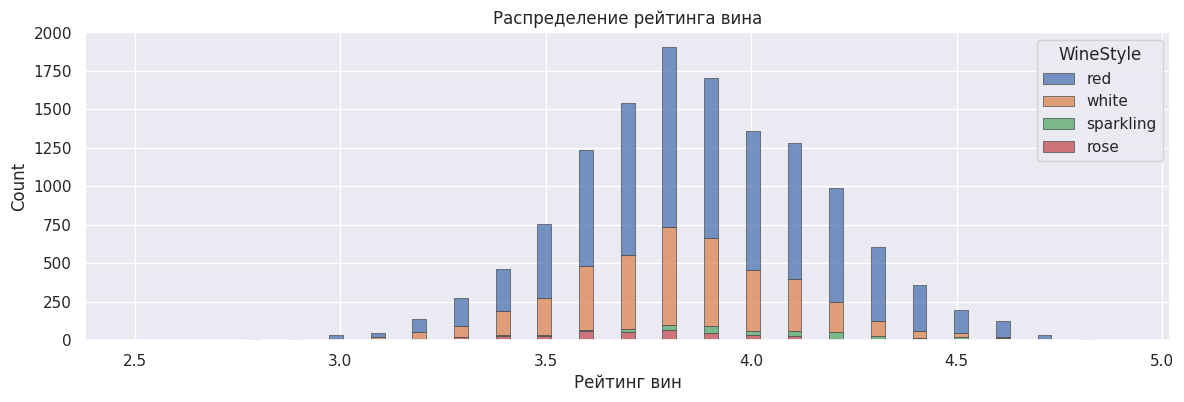

In [ ]:
plt.figure(figsize=(14,4))
sns.set_theme(style="darkgrid")
sns.histplot(x = 'Rating', data = wines, edgecolor=".3", hue="WineStyle", multiple="stack",
    linewidth=.5).set(title='Распределение рейтинга вина', xlabel='Рейтинг вин')

Выглядищие "нормальными" распределения данных рейтинга вин подвергли анализу на нормальность тестами Шапиро-Уилка и Харке-Бера:

In [ ]:
# Проверка на нормальность

print('Тест Шапиро-Уилка')
for wine_style in wines['WineStyle'].unique():
  stat, p = shapiro(wines.loc[wines['WineStyle'] == wine_style].Rating)
  print('stat=%.3f, p=%.3f' % (stat, p))
  if p > 0.05:
    print(f'Данные для {wine_style} wine скорее всего распределены нормально')
  else:
    print(f'Данные для {wine_style} wine скорее всего распределены НЕнормально')
print('_'*70)


print('Тест Харке-бера')
for wine_style in wines['WineStyle'].unique():
  stat, p = jarque_bera(wines.loc[wines['WineStyle'] == wine_style].Rating)
  print('stat=%.3f, p=%.3f' % (stat, p))
  if p > 0.05:
    print(f'Данные для {wine_style} wine скорее всего распределены нормально')
  else:
    print(f'Данные для {wine_style} wine скорее всего распределены НЕнормально')

Тест Шапиро-Уилка
stat=0.990, p=0.000
Данные для red wine скорее всего распределены НЕнормально
stat=0.987, p=0.000
Данные для white wine скорее всего распределены НЕнормально
stat=0.976, p=0.000
Данные для sparkling wine скорее всего распределены НЕнормально
stat=0.982, p=0.000
Данные для rose wine скорее всего распределены НЕнормально
______________________________________________________________________
Тест Харке-бера
stat=4.954, p=0.084
Данные для red wine скорее всего распределены нормально
stat=18.031, p=0.000
Данные для white wine скорее всего распределены НЕнормально
stat=4.930, p=0.085
Данные для sparkling wine скорее всего распределены нормально
stat=8.308, p=0.016
Данные для rose wine скорее всего распределены НЕнормально


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Для подтверждения/опровержения Гипотезы №1 о связи возраста вина и его рейтинга строили столбчатую диаграмму зависимости рейтинга от года (данные для вин старше 2012 года) для каждого сорта вина:

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


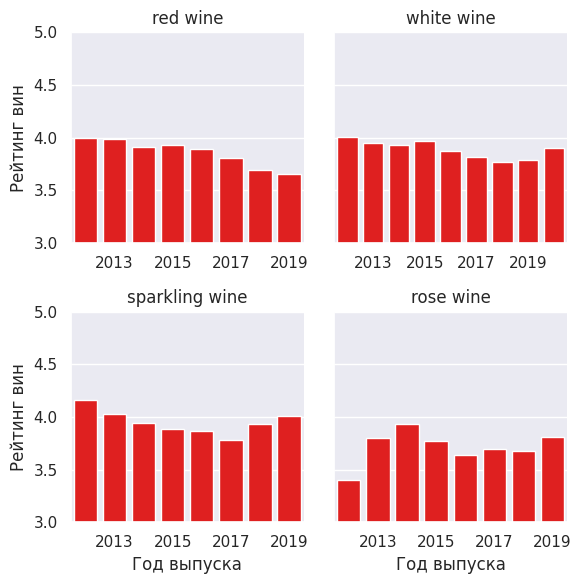

In [ ]:
# Строим стобчатую диаграмму для связи года производства вина и его рейтингом.

g = sns.FacetGrid(wines.loc[wines['Year'] >= 2012], col='WineStyle', col_wrap=2, sharex=False)
g.set(ylim=(3, 5))
g.map(sns.barplot, "Year", "Rating", errorbar=None, color ='red')

for ax in g.axes.flat:
    labels = ax.get_xticklabels() # get x labels
    for i,l in enumerate(labels):
        if(i%2 == 0): labels[i] = '' # skip even labels
    ax.set_xticklabels(labels) # set new labels

g.set_titles(col_template="{col_name} wine")
g.set_axis_labels("Год выпуска", "Рейтинг вин")
plt.show()

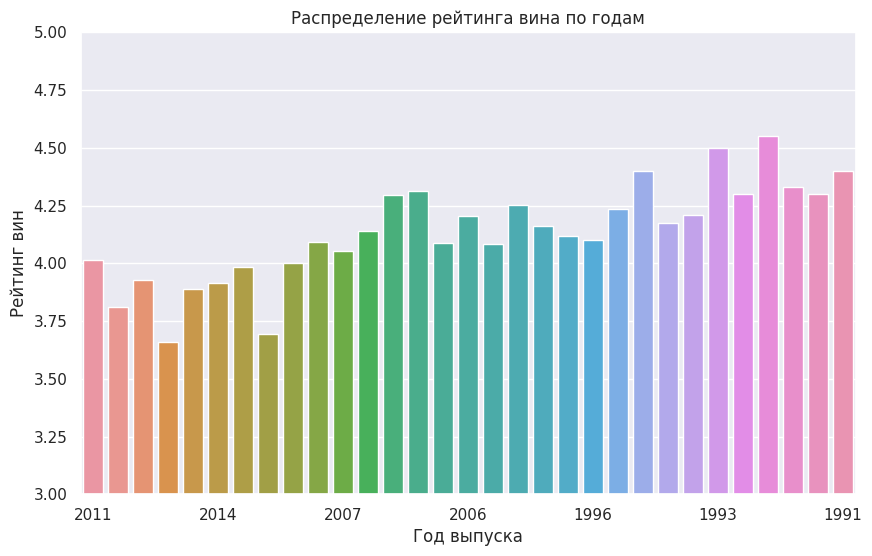

In [ ]:
style = 'Red'

wine = pd.read_csv(f'winestyle/{style}.csv')
wine = wine.drop(wine[wine.Year == 'N.V.'].index)

fig = plt.subplots(figsize=(10, 6))
sns.barplot(y='Rating', x='Year', data=wine, errorbar=None).set(
    title='Распределение рейтинга вина по годам',
    xlabel='Год выпуска',
    ylabel='Рейтинг вин')

range = int(wine['Year'].unique().max()) - int(wine['Year'].unique().min())
plt.xticks(np.arange(0, range, step=5))
plt.ylim(3, 5)

plt.show()

Точечная диаграмма показывает взаимосвязь 3-х переменных - года производства вина, его рейтинга и количества вин с одинаковым возрастом и оценкой:

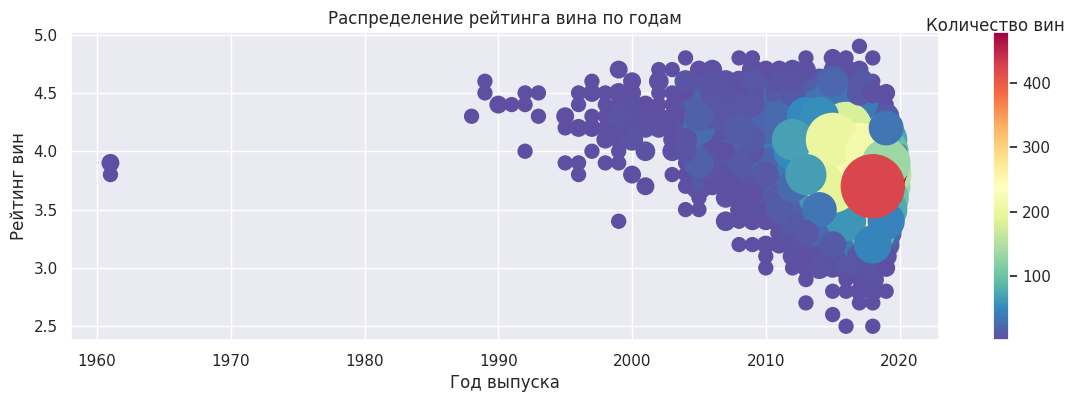

In [ ]:
wines.groupby(wines.columns.tolist(), as_index=False).size()

points=list(set(zip(wines.Year,wines.Rating)))
#Generate a list of point counts
count=[len([x for x,y in zip(wines.Year,wines.Rating ) if x==p[0] and y==p[1]]) for p in points]
#Now for the plotting:
plot_x=[i[0] for i in points]
plot_y=[i[1] for i in points]
count=np.array(count)

plt.figure(figsize=(14,4))

plt.scatter(plot_x, plot_y, c=count, s=100*count**0.5, cmap='Spectral_r')

plt.title("Распределение рейтинга вина по годам")
plt.xlabel("Год выпуска")
plt.ylabel("Рейтинг вин")

clb = plt.colorbar()
clb.set_label('Количество вин', labelpad=-40, y=1.05, rotation=0)

plt.show()

Для проверки гипотезы корреляции рейтинга и года производства мы воспользовались двумя тестами  — значимость корреляции Пирсона (случай равных дисперсий и нормальности данных) и Спирмана (без этих предположений):
Где H0 - выборки независимы, а H1 - существует зависимость между переменными.

In [ ]:
# statistics
# тест Пирсона
stat, p = pearsonr(wine.Year.astype(int), wine.Rating)
print('stat=%.3f, p=%.f' % (stat, p))
if p < 0.05:
    print('Рейтинг линейно зависит от года выпуска')
else:
    print('Рейтинг Нелинейно зависит от года выпуска')

# тест Спирмана
stat, p = spearmanr(wine.Year.astype(int), wine.Rating)
print('stat=%.3f, p=%.f' % (stat, p))
if p < 0.05:
    print('Рейтинг зависит от года выпуска')
else:
    print('Рейтинг Не зависит от года выпуска')

stat=-0.343, p=0
Рейтинг линейно зависит от года выпуска
stat=-0.367, p=0
Рейтинг зависит от года выпуска


Т.к. p-value для всех вин меньше 0,05 то мы должны отвергнуть H0 о том, что данные распределены нормально в пользу альтернативной гипотезы

Отобразим коффициенты корреляции Пирсона в виде матрицы:

In [ ]:
wines[['Rating', 'Price', 'Year']].corr()

,Rating,Price,Year
Rating,1.000000,0.449716,-0.340366
Price,0.449716,1.000000,-0.378619
Year,-0.340366,-0.378619,1.000000


Для подтверждения/опровержения Гипотезы №2 о связи возраста вина и его цены строили диаграмму box-plot, показывающую зависимость цены от года:

<ipython-input-22-2d376f297127>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  graph.set_yticklabels(np.exp(graph.get_yticks()).astype(int))


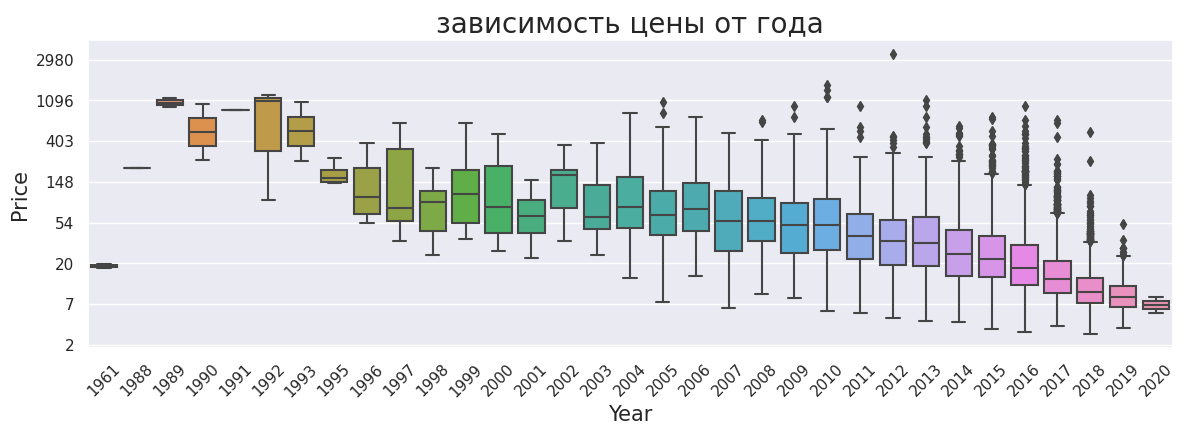

In [ ]:
plt.figure(figsize=(14,4))
graph = sns.boxplot(x='Year', y=np.log(wines['Price']),
                    data=wines)
graph.set_title("зависимость цены от года", fontsize=20)
graph.set_xlabel("Year", fontsize=15)
graph.set_ylabel("Price", fontsize=15)
graph.set_xticklabels(graph.get_xticklabels(),rotation=45)
graph.set_yticklabels(np.exp(graph.get_yticks()).astype(int))

plt.show()


Для проверки гипотезы корреляции цены вина и года производства мы также воспользовались тестом Пирсона и Спирмана: Где H0 - выборки независимы, а H1 - существует зависимость между переменными.

In [ ]:
# statistics
# тест Пирсона
stat, p = pearsonr(wine.Year.astype(int), wine.Price)
print('stat=%.3f, p=%.f' % (stat, p))
if p < 0.05:
    print('Цена линейно зависит от года выпуска')
else:
    print('Цена Нелинейно зависит от года выпуска')

# тест Спирмана
stat, p = spearmanr(wine.Year.astype(int), wine.Price)
print('stat=%.3f, p=%.f' % (stat, p))
if p < 0.05:
    print('Цена зависит от года выпуска')
else:
    print('Цена Не зависит от года выпуска')

stat=-0.364, p=0
Цена линейно зависит от года выапуска
stat=-0.577, p=0
Цена зависит от года выапуска


Т.к. p-value для всех вин меньше 0,05 то мы должны отвергнуть H0 о том, что данные распределены нормально в пользу альтернативной гипотезы

Для валидации полученных результатов корреляции рейтинг-возраст и цена-возраст мы построили зависимость ***цена-рейтинг*** в виде точечной диаграммы (с логарифмической шкалой y):

<ipython-input-23-41f0274286d3>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  graph.set_xticklabels(np.exp(graph.get_xticks()).astype(int))


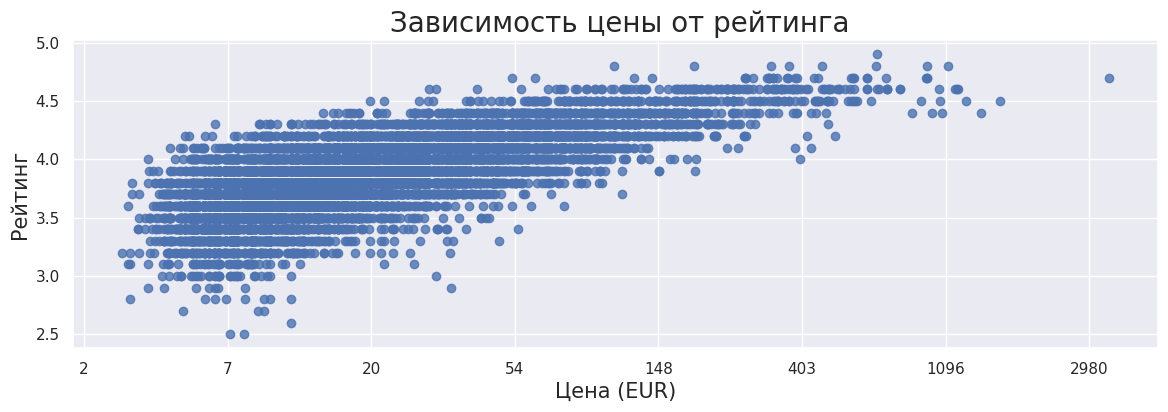

In [ ]:
# Зависимость цены от рейтинга
plt.figure(figsize=(14,4))

graph = sns.regplot(x=np.log(wines['Price']), y='Rating',
                    data=wines, fit_reg=False)
graph.set_title(" Зависимость цены от рейтинга", fontsize=20)
graph.set_xlabel("Цена (EUR)", fontsize= 15)
graph.set_ylabel("Рейтинг", fontsize= 15)
graph.set_xticklabels(np.exp(graph.get_xticks()).astype(int))

plt.show()

Последним шагом мы решили посмотреть на страны с максимальным производством вина (12 стран) и ими оказались следующие:

In [ ]:
# Отбор стран, с наибольшим производством вина
countries_with_max = wines.Country.value_counts()[:12]
countries_with_max

Italy            3636
France           3144
Spain            1483
Germany          1176
South Africa      833
United States     525
Austria           477
Chile             429
Portugal          327
Australia         313
Argentina         308
New Zealand       164
Name: Country, dtype: int64

Для визуализации воспользовались графиком box-plot с отображением ящиков по убыванию медианы:

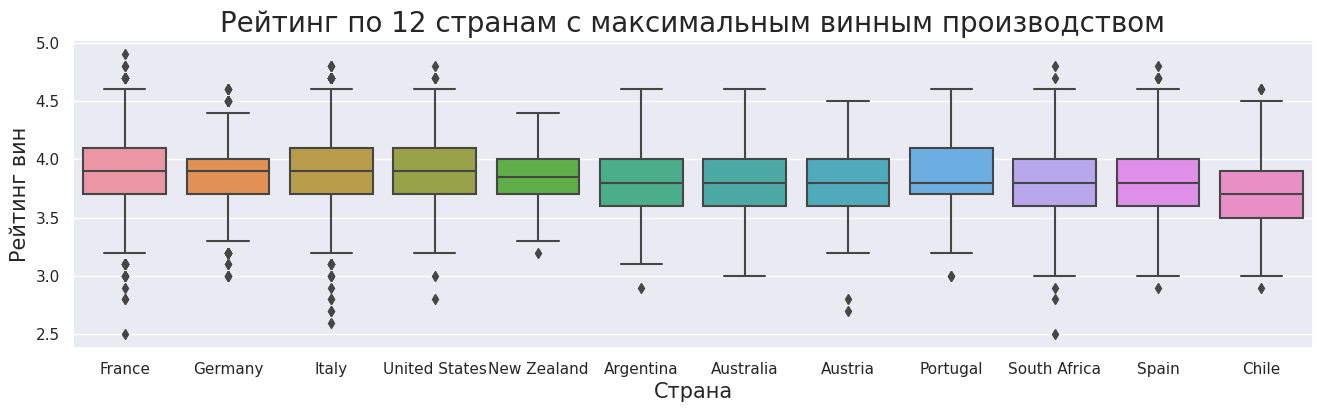

In [ ]:
# Отображение ящиков по убыванию медианы
max_countries = wines[wines.Country.isin(countries_with_max.index.values)]
grp_order = max_countries.groupby('Country').Rating.agg('median').sort_values(ascending=False).index

plt.figure(figsize=(16,4))

graph = sns.boxplot(x='Country', y="Rating", data=max_countries, order=grp_order)
graph.set_title("Рейтинг по 12 странам с максимальным винным производством", fontsize=20)
graph.set_xlabel("Страна", fontsize=15)
graph.set_ylabel("Рейтинг вин", fontsize=15)
graph.set_xticklabels(graph.get_xticklabels())

plt.show()

# 3.Выводы

Было проверено, что данные для Тест Пирсона показал, что рейтинг вина и его цена линейно зависит от его года выпуска с коэффициентами -0.343 и -0.364 соответственно. Гипотеза №1 и №2 подтвердились.

In [ ]:
%%shell
jupyter nbconvert --to html /content/wine_stat.ipynb

[NbConvertApp] Converting notebook /content/wine_stat.ipynb to html
[NbConvertApp] Writing 1203490 bytes to /content/wine_stat.html
